In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("SidewalkStepsBlockgroup.csv")

In [37]:
sw.head()

,FID,FID_1,OBJECTID,FID_1_1,Source,Material,Width,Unnamed: 7,LengthMile,Type,...,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,OBJECTID_1,SHAPE_Le_1,SHAPE_Area,FIPS_Num,Distance
0,0,23411,23441,23441,,,0,NaN,0.072439,1,...,Block Group 1,389986,0,40.462122,-79.960947,34,11188.102692,4.197425e+06,4.200306e+11,0
1,1,23412,23442,23442,,,0,NaN,0.062109,1,...,Block Group 1,389986,0,40.462122,-79.960947,34,11188.102692,4.197425e+06,4.200306e+11,0
2,2,23413,23443,23443,,,0,NaN,0.015296,1,...,Block Group 1,389986,0,40.462122,-79.960947,34,11188.102692,4.197425e+06,4.200306e+11,0
3,3,23414,23444,23444,,,0,NaN,0.026267,1,...,Block Group 1,389986,0,40.462122,-79.960947,34,11188.102692,4.197425e+06,4.200306e+11,0
4,4,23415,23445,23445,,,0,NaN,0.026619,1,...,Block Group 1,389986,0,40.462122,-79.960947,34,11188.102692,4.197425e+06,4.200306e+11,0


In [38]:
print(sw.columns.tolist())

['FID', 'FID_1', 'OBJECTID', 'FID_1_1', 'Source', 'Material', 'Width', 'Unnamed: 7', 'LengthMile', 'Type', 'Elevation', 'MPH', 'Municipali', 'County', 'Neighborho', 'Type_Name', 'RoadName', 'Subdiv_Nam', 'Unincorp_M', 'Shape__Len', 'Shape_Leng', 'FID_2', 'GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'OBJECTID_1', 'SHAPE_Le_1', 'SHAPE_Area', 'FIPS_Num', 'Distance']


In [39]:
print(sw['County'].unique())

['Allegheny' 'Butler' 'Armstrong' 'Westmoreland' 'Beaver' 'Lawrence'
 'Fayette' 'Greene' 'Indiana' 'Washington' 'Crosswalk']


In [40]:
print(sw['Municipali'].unique())

['Pittsburgh' 'Penn Hills' 'Wilkinsburg Borough' 'Swissvale Borough'
 'Pine Township' 'Adams Township' 'Cranberry Township' 'Leet Township'
 'Leetsdale Borough' 'Crescent Township' 'Moon Township'
 'Whitaker Borough' 'Braddock Borough' 'Rankin Borough' 'Edgewood Borough'
 'Churchill Borough' 'Dayton' 'Wayne Township' 'Mahoning Township'
 'South Bethlehem' 'Madison Township' 'Hovey Township' 'Parker'
 "Brady's Bend Township" 'West Franklin Township' 'Worthington'
 'East Franklin Township' 'Applewold' 'West Kittanning' 'Kittanning'
 'Cowanshannock Township' 'Rural Valley' 'Atwood' 'Manor Township'
 'Ford Cliff' 'Manorville' 'Ford City' 'North Buffalo Township'
 'Cadogan Township' 'Gilpin Township' 'Allegheny Township'
 'Parks Township' 'Vandergrift' 'North Apollo' 'Apollo'
 'Kiskiminetas Township' 'Elderton' 'Leechburg' 'Freeport Borough'
 'Darlington' 'Chippewa Township' 'Patterson Township' 'Patterson Heights'
 'Beaver Falls' 'Eastvale' 'New Brighton' 'Pulaski Township'
 'Freedom Borou

In [45]:
df = sw[sw['Municipali'] == 'Pittsburgh']

In [48]:
print(df['Municipali'].unique())

['Pittsburgh']


In [42]:
print(df['LengthMile'].describe())

count    42742.000000
mean         0.031924
std          0.041558
min          0.000071
25%          0.004658
50%          0.019611
75%          0.043082
max          0.751068
Name: LengthMile, dtype: float64


In [49]:
print(df.groupby('Neighborho')['LengthMile'].describe())

                   count      mean       std       min       25%       50%  \
Neighborho                                                                   
Allegheny Center   556.0  0.020796  0.020062  0.000385  0.005143  0.015423   
Allegheny West     187.0  0.028713  0.029730  0.000504  0.007465  0.019682   
Allentown          393.0  0.033834  0.041900  0.000394  0.014146  0.022838   
Arlington          176.0  0.039447  0.037793  0.000605  0.018568  0.025937   
Arlington Heights   79.0  0.021246  0.047897  0.000373  0.004715  0.008756   
...                  ...       ...       ...       ...       ...       ...   
West End           129.0  0.030324  0.045716  0.000594  0.000954  0.018225   
West Oakland       319.0  0.024181  0.034327  0.000290  0.001707  0.010139   
Westwood           208.0  0.041112  0.061182  0.000612  0.010871  0.020186   
Wilkinsburg          1.0  0.022960       NaN  0.022960  0.022960  0.022960   
Windgap             95.0  0.048729  0.049106  0.001982  0.014562

In [50]:
result = (df.groupby('Neighborho')['LengthMile'].sum().reset_index())

print(result)

           Neighborho  LengthMile
0    Allegheny Center   11.562439
1      Allegheny West    5.369388
2           Allentown   13.296787
3           Arlington    6.942624
4   Arlington Heights    1.678418
..                ...         ...
91           West End    3.911820
92       West Oakland    7.713750
93           Westwood    8.551332
94        Wilkinsburg    0.022960
95            Windgap    4.629260

[96 rows x 2 columns]


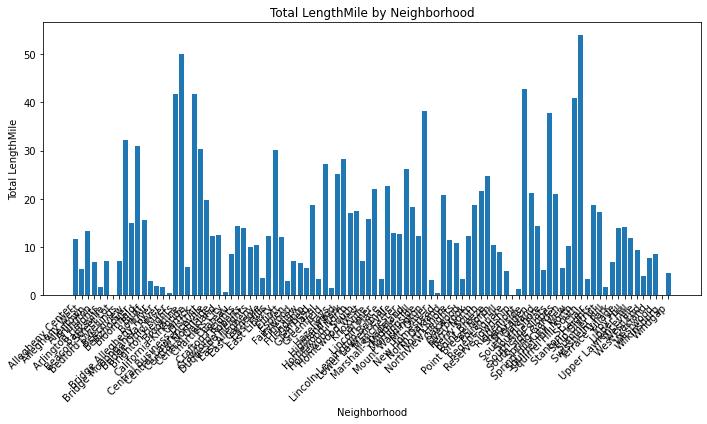

In [51]:
plt.figure(figsize=(10, 6))
result.dropna()
plt.bar(result['Neighborho'], result['LengthMile'])
plt.xlabel('Neighborhood')
plt.ylabel('Total LengthMile')
plt.title('Total LengthMile by Neighborhood')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

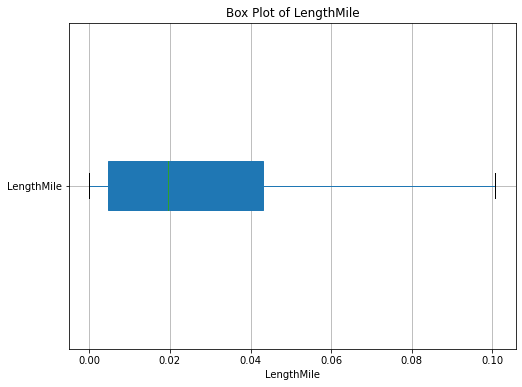

In [58]:
plt.figure(figsize=(8, 6))
df.boxplot(column='LengthMile', vert=False, patch_artist=True, showfliers=False)
plt.title('Box Plot of LengthMile')
plt.xlabel('LengthMile')
plt.show()

In [61]:
summary_table = df.groupby('Neighborho').agg({
    'LengthMile': ['count', 'sum']
}).reset_index()

# Rename columns for clarity
summary_table.columns = ['Neighborhood', 'SidewalkCount', 'TotalSidewalkLength']

# Sort the table by count of sidewalks in descending order
summary_table = summary_table.sort_values(by='SidewalkCount', ascending=False)

# Print the summary table
print(summary_table)

                 Neighborhood  SidewalkCount  TotalSidewalkLength
20  Central Business District           1898            30.222520
81        Squirrel Hill South           1533            53.880230
76           South Side Flats           1481            37.827276
72                  Shadyside           1304            42.669316
80        Squirrel Hill North           1279            40.824038
..                        ...            ...                  ...
58              New Homestead              4             0.396068
6           Beacon Street Lot              4             0.134368
15          Bridge Ohio River              2             0.397248
70           Reserve Township              1             0.006647
94                Wilkinsburg              1             0.022960

[96 rows x 3 columns]


In [62]:
summary_table = df.groupby('Neighborho').agg({
    'LengthMile': ['count', 'sum']
}).reset_index()

# Rename columns for clarity
summary_table.columns = ['Neighborhood', 'SidewalkCount', 'TotalSidewalkLength']

# Sort the table by count of sidewalks in descending order
summary_table = summary_table.sort_values(by='TotalSidewalkLength', ascending=False)

# Print the summary table
print(summary_table)

           Neighborhood  SidewalkCount  TotalSidewalkLength
81  Squirrel Hill South           1533            53.880230
17            Brookline           1033            50.080313
72            Shadyside           1304            42.669316
19              Carrick            975            41.807489
16     Brighton Heights            939            41.742417
..                  ...            ...                  ...
15    Bridge Ohio River              2             0.397248
58        New Homestead              4             0.396068
6     Beacon Street Lot              4             0.134368
94          Wilkinsburg              1             0.022960
70     Reserve Township              1             0.006647

[96 rows x 3 columns]
